<a href="https://colab.research.google.com/github/NehaJOShi259/FitPulse-Health-Anomaly-Detection-from-Fitness-Devices/blob/main/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

data = pd.read_csv('/content/Clean.csv')
print(data.head())


Saving Clean.csv to Clean.csv


In [3]:
import pandas as pd

data = pd.read_csv('/content/Clean.csv')
print(data.head())


   Person ID Gender  Age            Occupation            Job category  \
0          1   Male   27     Software Engineer  Science and Technology   
1          2   Male   28                Doctor              Healthcare   
2          3   Male   28                Doctor              Healthcare   
3          4   Male   28  Sales Representative     Business Management   
4          5   Male   28  Sales Representative     Business Management   

   Sleep Duration  Quality of Sleep  Physical Activity Level  Stress Level  \
0             6.1                 6                       42             6   
1             6.2                 6                       60             8   
2             6.2                 6                       60             8   
3             5.9                 4                       30             8   
4             5.9                 4                       30             8   

  BMI Category  Weight Category  Systolic Blood Pressure  \
0   Overweight            

In [8]:
import os
os.makedirs('/content/Milestone_3_AnomalyDetection/visualizations', exist_ok=True)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


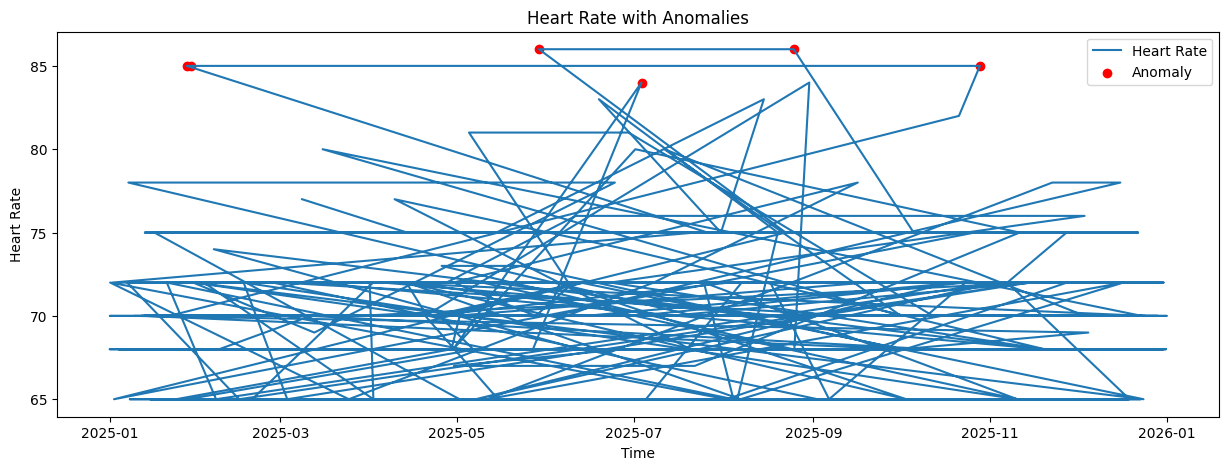

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import os

# Make folder
os.makedirs('/content/Milestone_3_AnomalyDetection/visualizations', exist_ok=True)

# Load CSV (uploaded manually)
data = pd.read_csv('/content/Clean.csv')

# Prepare Heart Rate
hr = data[['Timestamp', 'Heart Rate']].rename(columns={'Timestamp':'time','Heart Rate':'value'})
hr['time'] = pd.to_datetime(hr['time'])
hr_prophet = hr[['time','value']].rename(columns={'time':'ds','value':'y'})

# Train model
model_hr = Prophet()
model_hr.fit(hr_prophet)

# Forecast & residuals
forecast_hr = model_hr.predict(hr_prophet)
hr_prophet['predicted'] = forecast_hr['yhat']
hr_prophet['residual'] = hr_prophet['y'] - hr_prophet['predicted']
hr_prophet['residual_anomaly'] = abs(hr_prophet['residual']) > 3*hr_prophet['residual'].std()

# Plot & save
plt.figure(figsize=(15,5))
plt.plot(hr_prophet['ds'], hr_prophet['y'], label='Heart Rate')
plt.scatter(hr_prophet['ds'][hr_prophet['residual_anomaly']],
            hr_prophet['y'][hr_prophet['residual_anomaly']],
            color='red', label='Anomaly')
plt.title('Heart Rate with Anomalies')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.legend()
plt.savefig('/content/Milestone_3_AnomalyDetection/visualizations/heart_rate_anomalies.png')
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


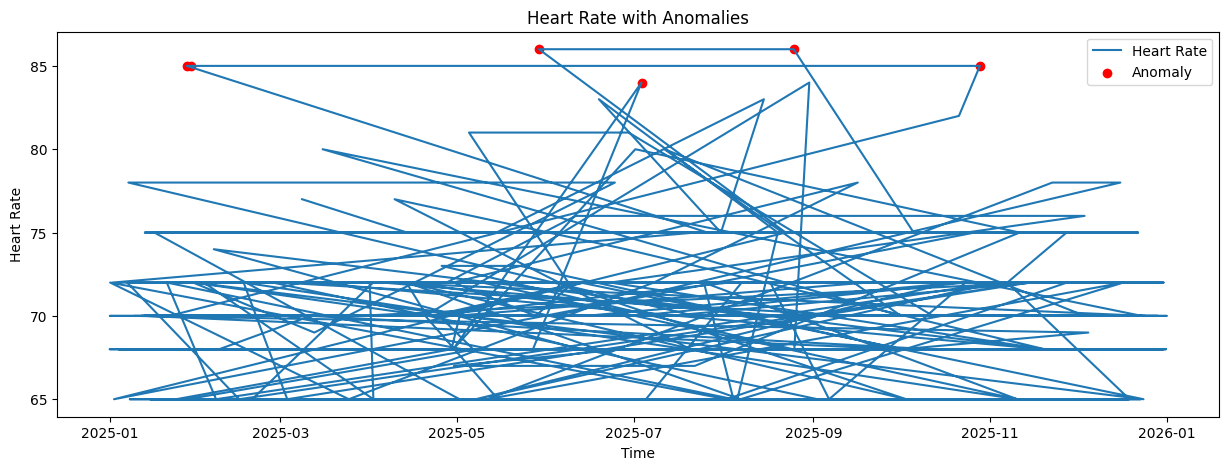

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


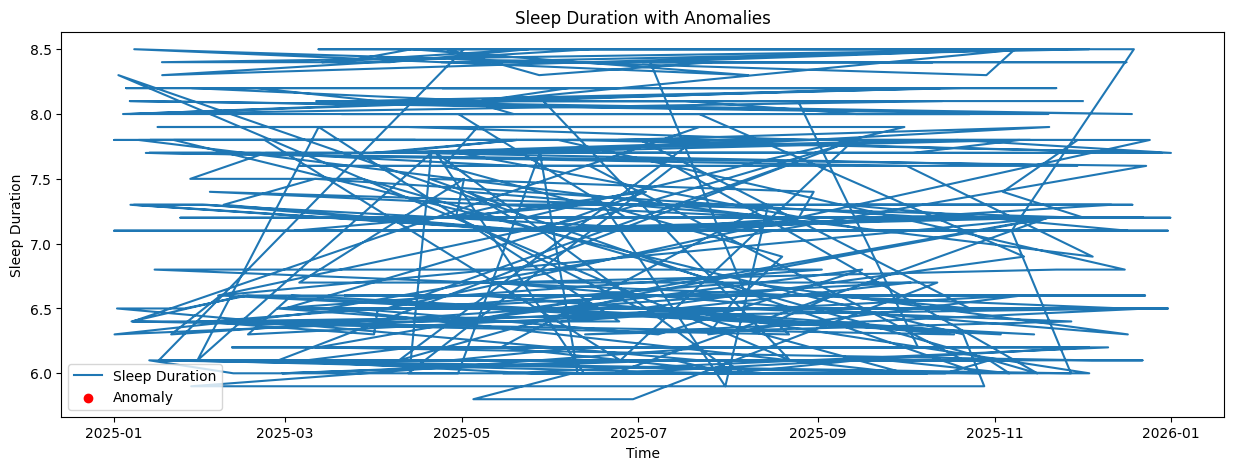

In [11]:
# =========================
# MILESTONE 3: ANOMALY DETECTION & VISUALIZATION
# =========================

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import os

# Step 1: Create folder to save plots
os.makedirs('/content/Milestone_3_AnomalyDetection/visualizations', exist_ok=True)

# Step 2: Load dataset (uploaded manually in Colab)
data = pd.read_csv('/content/Clean.csv')

# -----------------------
# HEART RATE
# -----------------------
hr = data[['Timestamp', 'Heart Rate']].rename(columns={'Timestamp':'time','Heart Rate':'value'})
hr['time'] = pd.to_datetime(hr['time'])
hr_prophet = hr[['time','value']].rename(columns={'time':'ds','value':'y'})

# Train Prophet model
model_hr = Prophet()
model_hr.fit(hr_prophet)

# Forecast & residuals
forecast_hr = model_hr.predict(hr_prophet)
hr_prophet['predicted'] = forecast_hr['yhat']
hr_prophet['residual'] = hr_prophet['y'] - hr_prophet['predicted']
hr_prophet['residual_anomaly'] = abs(hr_prophet['residual']) > 3*hr_prophet['residual'].std()

# Plot Heart Rate anomalies
plt.figure(figsize=(15,5))
plt.plot(hr_prophet['ds'], hr_prophet['y'], label='Heart Rate')
plt.scatter(hr_prophet['ds'][hr_prophet['residual_anomaly']],
            hr_prophet['y'][hr_prophet['residual_anomaly']],
            color='red', label='Anomaly')
plt.title('Heart Rate with Anomalies')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.legend()
plt.savefig('/content/Milestone_3_AnomalyDetection/visualizations/heart_rate_anomalies.png')
plt.show()

# -----------------------
# SLEEP DURATION
# -----------------------
sleep = data[['Timestamp', 'Sleep Duration']].rename(columns={'Timestamp':'time','Sleep Duration':'value'})
sleep['time'] = pd.to_datetime(sleep['time'])
sleep_prophet = sleep[['time','value']].rename(columns={'time':'ds','value':'y'})

# Train Prophet model
model_sleep = Prophet()
model_sleep.fit(sleep_prophet)

# Forecast & residuals
forecast_sleep = model_sleep.predict(sleep_prophet)
sleep_prophet['predicted'] = forecast_sleep['yhat']
sleep_prophet['residual'] = sleep_prophet['y'] - forecast_sleep['yhat']
sleep_prophet['residual_anomaly'] = abs(sleep_prophet['residual']) > 3*sleep_prophet['residual'].std()

# Plot Sleep anomalies
plt.figure(figsize=(15,5))
plt.plot(sleep_prophet['ds'], sleep_prophet['y'], label='Sleep Duration')
plt.scatter(sleep_prophet['ds'][sleep_prophet['residual_anomaly']],
            sleep_prophet['y'][sleep_prophet['residual_anomaly']],
            color='red', label='Anomaly')
plt.title('Sleep Duration with Anomalies')
plt.xlabel('Time')
plt.ylabel('Sleep Duration')
plt.legend()
plt.savefig('/content/Milestone_3_AnomalyDetection/visualizations/sleep_anomalies.png')
plt.show()
